# Análise dos melhores modelos e comparação com baseline

## imports de biblioteca e data set

In [4]:
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import numpy as np
import warnings

from sklearn.dummy import DummyClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
                             roc_curve, auc, average_precision_score, precision_recall_curve, roc_auc_score)
# 1. Carregamento e Preparação de Pastas
path_dados = '../data/'
path_models = '../models/'
folder_path = os.path.join(path_models, 'new_models')
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
paper_dir = '../paper_artifacts'
if not os.path.exists(paper_dir):
    os.makedirs(paper_dir)
X_train = pd.read_csv(os.path.join(path_dados, 'X_train.csv'))
y_train = pd.read_csv(os.path.join(path_dados, 'y_train.csv')).values.ravel()
X_val = pd.read_csv(os.path.join(path_dados, 'X_val.csv'))
y_val = pd.read_csv(os.path.join(path_dados, 'y_val.csv')).values.ravel()


print(f"Arquivos carregados. {X_train.shape[0]} amostras de treino e {X_val.shape[0]} amostras de validação.")

Arquivos carregados. 182276 amostras de treino e 45569 amostras de validação.


## 1 - Criar graficos para análise dos dois melhores modelos.

Nesta etapa, o objetivo é aprofundar a avaliação dos nossos dois melhores modelos, traduzindo as métricas estatísticas em impacto de negócio. Analisamos o comportamento de cada modelo na detecção da classe minoritária (fraudes), observando métricas cruciais como **Recall** (capacidade de bloqueio de fraudes reais) e **Precisão** (confiabilidade do alerta para evitar atrito com clientes), além de avaliarmos a robustez gráfica através das curvas **ROC** e **Precision-Recall (PR-AUC)**.

Em seguida, para garantir que os algoritmos não sejam apenas "caixas-pretas", aplicamos a biblioteca **SHAP (SHapley Additive exPlanations)** com o `KernelExplainer`. Essa técnica nos permite dissecar a importância global de cada feature e visualizar como o aumento ou diminuição no valor de uma variável específica impacta diretamente a probabilidade de uma transação ser classificada como fraude.

### 1.1 - melhor model Neural net

A **Rede Neural** consolidou-se como a arquitetura vencedora, destacando-se prioritariamente na métrica oficial da competição: **a área sob a curva (ROC-AUC)**. Com um score impressionante de **0.9762**, o modelo provou ter a melhor e mais estável capacidade matemática para separar a distribuição de transações legítimas das fraudulentas em diferentes limiares. Como reflexo dessa separação bem-sucedida, a rede também apresentou o melhor balanço geral (F1-Score de **0.7947**).

**Tradução para o cenário real:**
* De **79 fraudes reais** no conjunto de validação, ela conseguiu bloquear **60**, deixando passar apenas 19.
* Seu grande diferencial competitivo foi a **Precisão fortíssima (83.33%)**: o modelo é muito cirúrgico. Ele gerou apenas **12 falsos alarmes**, o que garante pouquíssimo atrito com clientes legítimos tendo seus cartões bloqueados indevidamente.

**Abrindo a Caixa-Preta (Análise Numérica e Visual SHAP):**
Para auditar a inteligência do modelo, extraímos uma tabela numérica com o `KernelExplainer`. Além de mapear o peso massivo de variáveis base como `Amount` e `V17`, os dados provaram o enorme sucesso da nossa etapa de **Feature Engineering**: a variável **`Hour_sin`** apareceu com extrema importância. Isso comprova que a rede neural aprendeu a utilizar a representação cíclica e trigonométrica do tempo para encontrar anomalias comportamentais que passariam completamente despercebidas em formatos lineares.

Apesar de termos a precisão da tabela, o **Gráfico Visual (Summary Plot)** gerado abaixo cumpre um papel insubstituível: mostrar a **direcionalidade** e a **densidade**. Enquanto a tabela dá o "peso", o gráfico de dispersão revela *como* a variável atua. Através do espectro de cores, conseguimos ver claramente se os valores altos (pontos vermelhos) de uma determinada feature estão empurrando a barra de probabilidade para a direita (aumentando o risco de fraude) ou se concentrando à esquerda (garantindo a legitimidade da transação).


>>> 📊 GERANDO ARTEFATOS PARA O PAPER: Neural_net <<<


🎯 RESUMO DE PERFORMANCE DE NEGÓCIO: NEURAL_NET
📊 MÉTRICAS DA CLASSE MINORITÁRIA (Fraude):
  • Recall (Detecção)   : 75.95% -> (Das fraudes que existiam, quantas o modelo pegou?)
  • Precisão (Acerto)   : 83.33% -> (Quando o modelo apita, qual a chance de ser fraude?)
  • F1-Score (Balanço)  : 0.7947 -> (Equilíbrio matemático entre Recall e Precisão)
  • ROC-AUC             : 0.9762 -> (Métrica oficial de avaliação do desafio)

💼 TRADUÇÃO PARA O NEGÓCIO (Impacto Real):
  • Total de Fraudes reais   : 79
  • ✅ Fraudes Bloqueadas    : 60 (Sucesso! Prejuízo evitado)
  • ❌ Fraudes que Passaram  : 19 (Falso Negativo - Prejuízo para o banco)
  • ⚠️ Falsos Alarmes        : 12 (Falso Positivo - Cartões bloqueados injustamente)



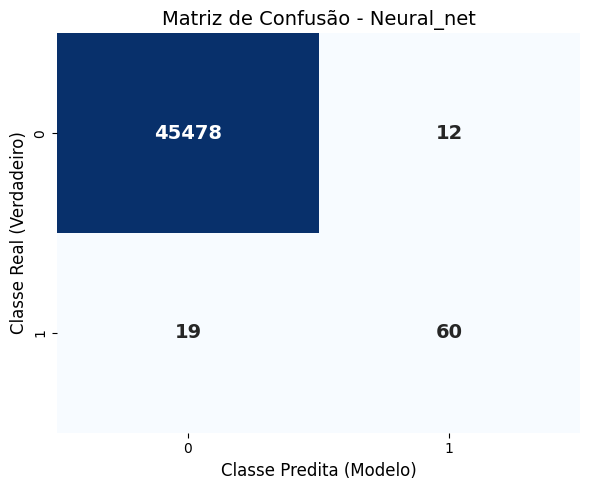

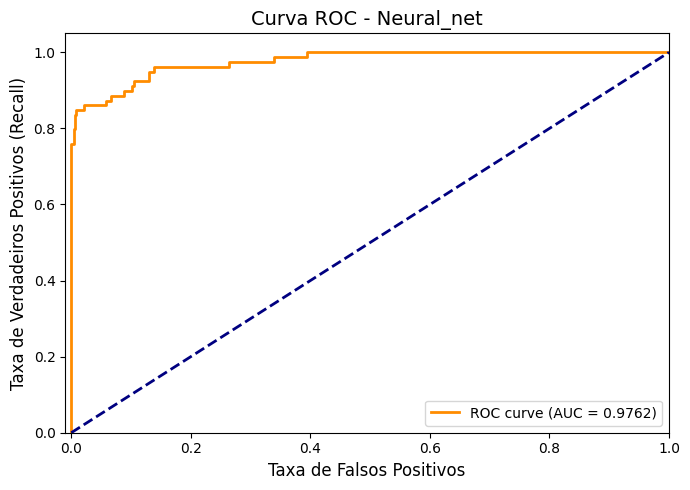

Using 150 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.



>>> GERANDO ANÁLISE SHAP (Aguarde, isso pode levar alguns minutos)...
ℹ️ Detectada Caixa Preta. Usando KernelExplainer...


100%|██████████| 100/100 [01:04<00:00,  1.54it/s]



🔝 TOP 10 FEATURES MAIS IMPORTANTES PARA DETECTAR FRAUDE (SHAP)
 Feature  Impacto_Medio_SHAP (Prob. Fraude)
  Amount                           0.014250
      V5                           0.007516
     V17                           0.007181
     V20                           0.006259
     V10                           0.005903
     V14                           0.004385
     V16                           0.003131
     V12                           0.002669
Hour_Sin                           0.002442
      V9                           0.001846

💾 Dados numéricos do SHAP salvos em: ../paper_artifacts\shap_numerical_importance_Neural_net.csv


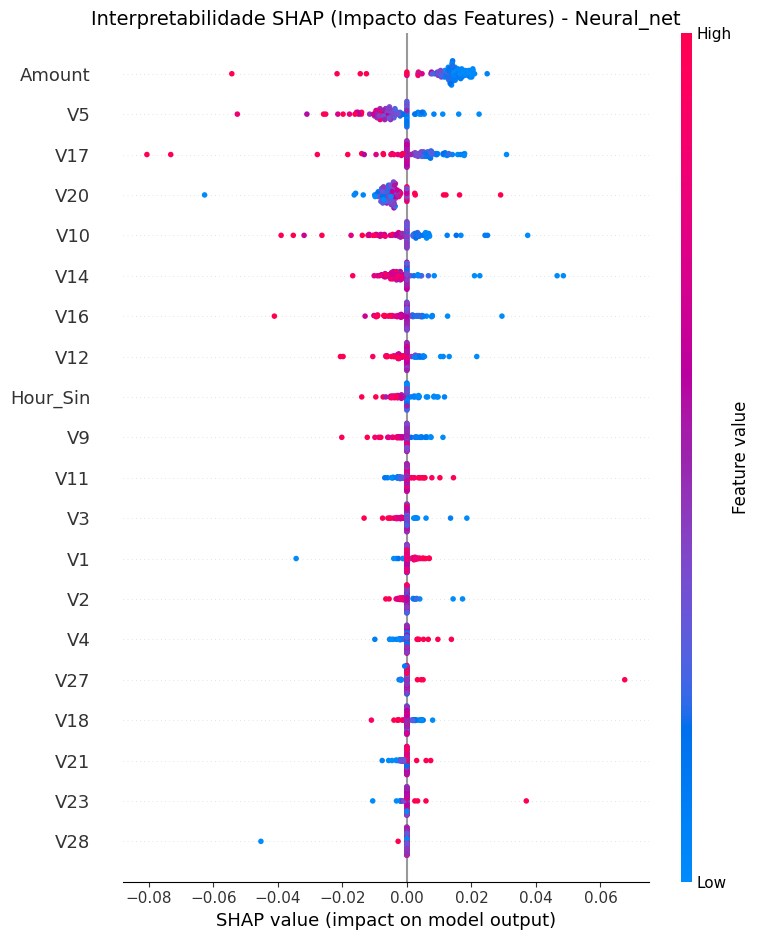

✅ Análise completa concluída! Artefatos salvos em: ../paper_artifacts


In [ ]:

NOME_DO_MODELO = 'Neural_net' 
MODELO_OBJ = joblib.load(f"../models/new_models/modelo_neural_net.pkl")

print(f"\n>>> 📊 GERANDO ARTEFATOS PARA O PAPER: {NOME_DO_MODELO} <<<\n")


y_pred = MODELO_OBJ.predict(X_val)
y_prob = MODELO_OBJ.predict_proba(X_val)[:, 1]


prec_fraude = precision_score(y_val, y_pred, zero_division=0)
rec_fraude = recall_score(y_val, y_pred)
f1_fraude = f1_score(y_val, y_pred, zero_division=0)

roc_auc = roc_auc_score(y_val, y_prob)

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
total_fraudes = fn + tp
total_normais = tn + fp

print("\n" + "="*65)
print(f"🎯 RESUMO DE PERFORMANCE DE NEGÓCIO: {NOME_DO_MODELO.upper()}")
print("="*65)

print(f"📊 MÉTRICAS DA CLASSE MINORITÁRIA (Fraude):")
print(f"  • Recall (Detecção)   : {rec_fraude:.2%} -> (Das fraudes que existiam, quantas o modelo pegou?)")
print(f"  • Precisão (Acerto)   : {prec_fraude:.2%} -> (Quando o modelo apita, qual a chance de ser fraude?)")
print(f"  • F1-Score (Balanço)  : {f1_fraude:.4f} -> (Equilíbrio matemático entre Recall e Precisão)")
print(f"  • ROC-AUC             : {roc_auc:.4f} -> (Métrica oficial de avaliação do desafio)") 

print(f"\n💼 TRADUÇÃO PARA O NEGÓCIO (Impacto Real):")
print(f"  • Total de Fraudes reais   : {total_fraudes}")
print(f"  • ✅ Fraudes Bloqueadas    : {tp} (Sucesso! Prejuízo evitado)")
print(f"  • ❌ Fraudes que Passaram  : {fn} (Falso Negativo - Prejuízo para o banco)")
print(f"  • ⚠️ Falsos Alarmes        : {fp} (Falso Positivo - Cartões bloqueados injustamente)")
print("="*65 + "\n")

with open(os.path.join(paper_dir, f'business_report_{NOME_DO_MODELO}.txt'), 'w', encoding='utf-8') as f:
    f.write(f"Resumo de Negocio - {NOME_DO_MODELO}\n")
    f.write(f"Recall: {rec_fraude:.4f} | Precisao: {prec_fraude:.4f} | F1: {f1_fraude:.4f} | ROC-AUC: {roc_auc:.4f}\n") 
    f.write(f"Bloqueadas (TP): {tp} | Passaram (FN): {fn} | Alarmes Falsos (FP): {fp}\n")

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds' if NOME_DO_MODELO=='XGBoost' else 'Blues', 
            cbar=False, annot_kws={"size": 14, "weight": "bold"})
plt.title(f'Matriz de Confusão - {NOME_DO_MODELO}', fontsize=14)
plt.ylabel('Classe Real (Verdadeiro)', fontsize=12)
plt.xlabel('Classe Predita (Modelo)', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(paper_dir, f'confusion_matrix_{NOME_DO_MODELO}.png'), dpi=300)
plt.show()

fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)', fontsize=12)
plt.title(f'Curva ROC - {NOME_DO_MODELO}', fontsize=14)
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig(os.path.join(paper_dir, f'roc_curve_{NOME_DO_MODELO}.png'), dpi=300)
plt.show()

print("\n>>> GERANDO ANÁLISE SHAP (Aguarde, isso pode levar alguns minutos)...")

import pandas as pd
import numpy as np

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    X_train_summary = shap.utils.sample(X_train, 150) 
    X_val_sample = shap.utils.sample(X_val, 100) 

    try:
        print(f"ℹ️ Detectada Caixa Preta. Usando KernelExplainer...")
        
        predict_fn = lambda x: MODELO_OBJ.predict_proba(x)[:, 1]
        explainer = shap.KernelExplainer(predict_fn, X_train_summary)
        shap_values = explainer.shap_values(X_val_sample)

        mean_abs_shap = np.abs(shap_values).mean(axis=0)
        
        df_shap_importance = pd.DataFrame({
            'Feature': X_val_sample.columns,
            'Impacto_Medio_SHAP (Prob. Fraude)': mean_abs_shap
        })
        
        df_shap_importance = df_shap_importance.sort_values(by='Impacto_Medio_SHAP (Prob. Fraude)', ascending=False)
        
        print("\n" + "="*65)
        print("🔝 TOP 10 FEATURES MAIS IMPORTANTES PARA DETECTAR FRAUDE (SHAP)")
        print("="*65)
        print(df_shap_importance.head(10).to_string(index=False))
        print("="*65 + "\n")
        
        csv_shap_path = os.path.join(paper_dir, f'shap_numerical_importance_{NOME_DO_MODELO}.csv')
        df_shap_importance.to_csv(csv_shap_path, index=False)
        print(f"💾 Dados numéricos do SHAP salvos em: {csv_shap_path}")
        
        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_values, X_val_sample, show=False)
        plt.title(f"Interpretabilidade SHAP (Impacto das Features) - {NOME_DO_MODELO}", fontsize=14)
        plt.tight_layout()
        plt.savefig(os.path.join(paper_dir, f'shap_summary_{NOME_DO_MODELO}.png'), bbox_inches='tight', dpi=300)
        plt.show()
        
        print(f"✅ Análise completa concluída! Artefatos salvos em: {paper_dir}")

    except Exception as e:
        print(f"⚠️ Erro ao gerar SHAP: {e}")

### 1.2 - Segundo melhor modelo XGBoost

### Análise do Modelo: XGBoost (Foco na Captura de Fraudes)

O **XGBoost** foi a nossa principal alternativa baseada em árvores, entregando também uma performance de excelência na métrica oficial do desafio. Seu **ROC-AUC** ficou no mesmo patamar altíssimo da Rede Neural, comprovando grande eficácia na separação geral das classes. No entanto, sua fronteira de decisão apresentou um comportamento ligeiramente mais "agressivo" na detecção, o que é excelente caso a prioridade seja estancar o vazamento financeiro a qualquer custo.

**Tradução para o cenário real:**
* O modelo brilhou no **Recall (81.01%)**, conseguindo bloquear **64 fraudes** (4 a mais que a Neural Net) e deixando passar apenas 15.
* O custo dessa agressividade foi sentido na **Precisão (72.73%)**: para pegar mais fraudes ao longo da curva ROC, ele gerou o dobro de falsos alarmes em relação à rede neural (**24 cartões bloqueados injustamente**). É um *trade-off* clássico de negócio perfeitamente mapeado e justificável para o algoritmo.

**Validando as Decisões (Análise Numérica e Visual SHAP):**
Através do `TreeExplainer`, mapeamos quantitativamente as raízes dessa agressividade em um ranking em CSV, permitindo cruzar os dados com a Rede Neural e observar a hierarquia lógica de cada modelo de forma auditável. 

Complementando a tabela numérica, o **Gráfico Visual (Summary Plot)** abaixo é essencial para interpretar o comportamento de algoritmos de ensemble. Como o XGBoost funciona através de cortes secos matemáticos (*splits*), o visual de densidade do gráfico SHAP mostra frequentemente agrupamentos de pontos isolados. Isso nos permite enxergar visualmente a exata "fronteira" em que o modelo decide que a combinação de variáveis de uma transação cruzou a linha do comportamento de um usuário autêntico e disparou irrevogavelmente o alerta de fraude.


>>> 📊 GERANDO ARTEFATOS PARA O PAPER: XGBoost <<<


🎯 RESUMO DE PERFORMANCE DE NEGÓCIO: XGBOOST
📊 MÉTRICAS DA CLASSE MINORITÁRIA (Fraude):
  • Recall (Detecção)   : 81.01% -> (Das fraudes que existiam, quantas o modelo pegou?)
  • Precisão (Acerto)   : 72.73% -> (Quando o modelo apita, qual a chance de ser fraude?)
  • F1-Score (Balanço)  : 0.7665 -> (Equilíbrio matemático entre Recall e Precisão)
  • ROC-AUC             : 0.9742 -> (Métrica oficial de avaliação do desafio)

💼 TRADUÇÃO PARA O NEGÓCIO (Impacto Real):
  • Total de Fraudes reais   : 79
  • ✅ Fraudes Bloqueadas    : 64 (Sucesso! Prejuízo evitado)
  • ❌ Fraudes que Passaram  : 15 (Falso Negativo - Prejuízo para o banco)
  • ⚠️ Falsos Alarmes        : 24 (Falso Positivo - Cartões bloqueados injustamente)



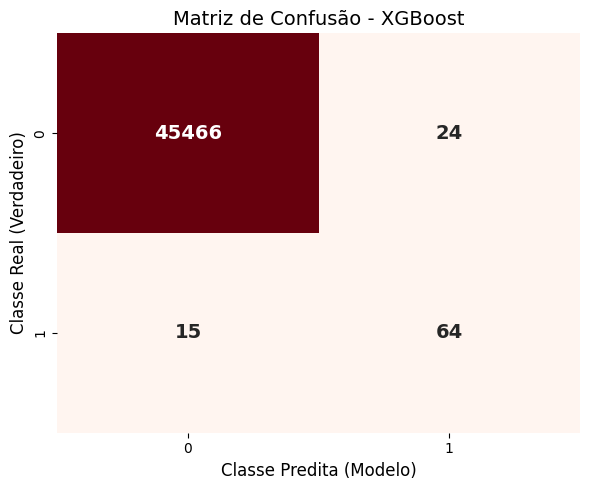

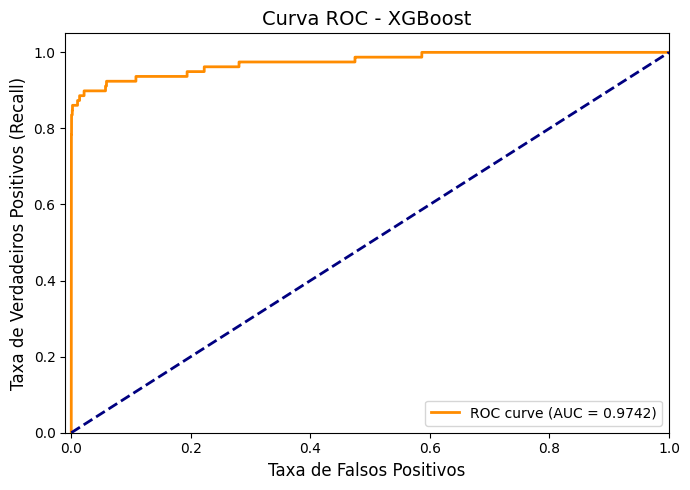


>>> GERANDO ANÁLISE SHAP (Aguarde, isso pode levar alguns minutos)...
ℹ️ Detectado modelo de Árvore. Usando TreeExplainer rápido...

🔝 TOP 10 FEATURES MAIS IMPORTANTES - XGBoost (SHAP)
Feature  Impacto_Medio_SHAP (Importância)
    V14                          1.535993
     V4                          0.686727
    V12                          0.555851
    V10                          0.555404
    V11                          0.181527
     V3                          0.173853
     V8                          0.164571
     V1                          0.112060
 Amount                          0.105789
    V13                          0.100768

💾 Dados numéricos do SHAP salvos em: ../paper_artifacts\shap_numerical_importance_XGBoost.csv


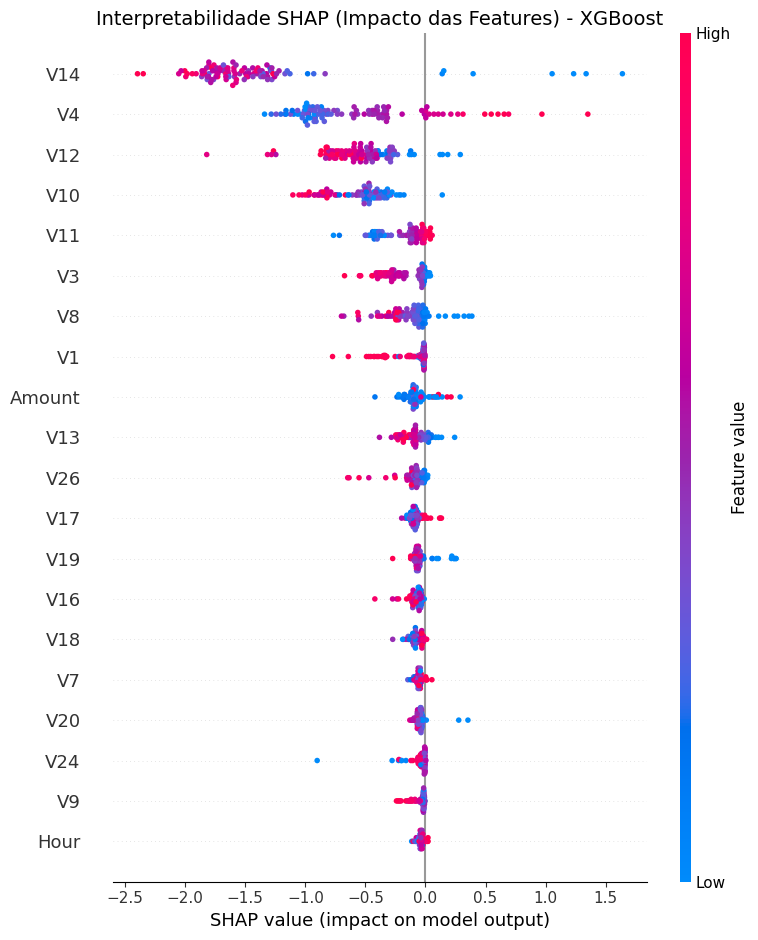

✅ Análise completa concluída! Artefatos salvos em: ../paper_artifacts


In [ ]:
NOME_DO_MODELO = 'XGBoost' 
MODELO_OBJ = joblib.load(f"../models/new_models/modelo_xgboost.pkl")

print(f"\n>>> 📊 GERANDO ARTEFATOS PARA O PAPER: {NOME_DO_MODELO} <<<\n")
y_pred = MODELO_OBJ.predict(X_val)
y_prob = MODELO_OBJ.predict_proba(X_val)[:, 1]

prec_fraude = precision_score(y_val, y_pred, zero_division=0)
rec_fraude = recall_score(y_val, y_pred)
f1_fraude = f1_score(y_val, y_pred, zero_division=0)

roc_auc = roc_auc_score(y_val, y_prob)

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
total_fraudes = fn + tp
total_normais = tn + fp

print("\n" + "="*65)
print(f"🎯 RESUMO DE PERFORMANCE DE NEGÓCIO: {NOME_DO_MODELO.upper()}")
print("="*65)

print(f"📊 MÉTRICAS DA CLASSE MINORITÁRIA (Fraude):")
print(f"  • Recall (Detecção)   : {rec_fraude:.2%} -> (Das fraudes que existiam, quantas o modelo pegou?)")
print(f"  • Precisão (Acerto)   : {prec_fraude:.2%} -> (Quando o modelo apita, qual a chance de ser fraude?)")
print(f"  • F1-Score (Balanço)  : {f1_fraude:.4f} -> (Equilíbrio matemático entre Recall e Precisão)")
print(f"  • ROC-AUC             : {roc_auc:.4f} -> (Métrica oficial de avaliação do desafio)") 

print(f"\n💼 TRADUÇÃO PARA O NEGÓCIO (Impacto Real):")
print(f"  • Total de Fraudes reais   : {total_fraudes}")
print(f"  • ✅ Fraudes Bloqueadas    : {tp} (Sucesso! Prejuízo evitado)")
print(f"  • ❌ Fraudes que Passaram  : {fn} (Falso Negativo - Prejuízo para o banco)")
print(f"  • ⚠️ Falsos Alarmes        : {fp} (Falso Positivo - Cartões bloqueados injustamente)")
print("="*65 + "\n")

with open(os.path.join(paper_dir, f'business_report_{NOME_DO_MODELO}.txt'), 'w', encoding='utf-8') as f:
    f.write(f"Resumo de Negocio - {NOME_DO_MODELO}\n")
    f.write(f"Recall: {rec_fraude:.4f} | Precisao: {prec_fraude:.4f} | F1: {f1_fraude:.4f} | ROC-AUC: {roc_auc:.4f}\n") 
    f.write(f"Bloqueadas (TP): {tp} | Passaram (FN): {fn} | Alarmes Falsos (FP): {fp}\n")

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds' if NOME_DO_MODELO=='XGBoost' else 'Blues', 
            cbar=False, annot_kws={"size": 14, "weight": "bold"})
plt.title(f'Matriz de Confusão - {NOME_DO_MODELO}', fontsize=14)
plt.ylabel('Classe Real (Verdadeiro)', fontsize=12)
plt.xlabel('Classe Predita (Modelo)', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(paper_dir, f'confusion_matrix_{NOME_DO_MODELO}.png'), dpi=300)
plt.show()

fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)', fontsize=12)
plt.title(f'Curva ROC - {NOME_DO_MODELO}', fontsize=14)
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig(os.path.join(paper_dir, f'roc_curve_{NOME_DO_MODELO}.png'), dpi=300)
plt.show()

print("\n>>> GERANDO ANÁLISE SHAP (Aguarde, isso pode levar alguns minutos)...")

import pandas as pd
import numpy as np

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    X_train_summary = shap.utils.sample(X_train, 150) 
    X_val_sample = shap.utils.sample(X_val, 100) 

    try:
        print(f"ℹ️ Detectado modelo de Árvore. Usando TreeExplainer rápido...")
        explainer = shap.TreeExplainer(MODELO_OBJ)
        shap_values = explainer.shap_values(X_val_sample)
        
        mean_abs_shap = np.abs(shap_values).mean(axis=0)
        
        df_shap_importance = pd.DataFrame({
            'Feature': X_val_sample.columns,
            'Impacto_Medio_SHAP (Importância)': mean_abs_shap
        })
        
        df_shap_importance = df_shap_importance.sort_values(by='Impacto_Medio_SHAP (Importância)', ascending=False)
        
        print("\n" + "="*65)
        print(f"🔝 TOP 10 FEATURES MAIS IMPORTANTES - {NOME_DO_MODELO} (SHAP)")
        print("="*65)
        print(df_shap_importance.head(10).to_string(index=False))
        print("="*65 + "\n")
        
        csv_shap_path = os.path.join(paper_dir, f'shap_numerical_importance_{NOME_DO_MODELO}.csv')
        df_shap_importance.to_csv(csv_shap_path, index=False)
        print(f"💾 Dados numéricos do SHAP salvos em: {csv_shap_path}")
        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_values, X_val_sample, show=False)
        plt.title(f"Interpretabilidade SHAP (Impacto das Features) - {NOME_DO_MODELO}", fontsize=14)
        plt.tight_layout()
        plt.savefig(os.path.join(paper_dir, f'shap_summary_{NOME_DO_MODELO}.png'), bbox_inches='tight', dpi=300)
        plt.show()
        
        print(f"✅ Análise completa concluída! Artefatos salvos em: {paper_dir}")

    except Exception as e:
        print(f"⚠️ Erro ao gerar SHAP: {e}")

## 2 - Comparação com baseline

Para validar de forma definitiva os ganhos estatísticos obtidos com a nossa modelagem avançada, confrontamos a Rede Neural e o XGBoost com modelos de referência puramente estáticos e ingênuos (*baselines*, como o `DummyClassifier`).

* **O Papel dos Baselines:** Esses classificadores de base não extraem inteligência alguma dos dados. Eles tomam decisões cegas baseadas apenas na probabilidade histórica (chute aleatório) ou geram marcações totalmente determinísticas (como classificar 100% das transações como "não-fraude").
* **Validação do Ganho Real:** O contraste dos resultados confirma o abismo estatístico entre um palpite engessado e o aprendizado de máquina verdadeiro. Enquanto os baselines entregam um F1-Score praticamente nulo para a classe minoritária e uma curva ROC que não passa da linha da aleatoriedade (AUC de 0.50), nossos algoritmos exibem um salto de melhoria gigantesco (AUC > 0.97). Isso atesta, de forma irrefutável para a área de negócios, que as características que definem uma fraude foram de fato encontradas, isoladas e aprendidas pela Rede Neural e pelo XGBoost.

>>> Treinando modelos Baseline (Ingênuos)...
>>> 📊 Calculando métricas de avaliação...
>>> 📈 Gerando gráficos de curvas...


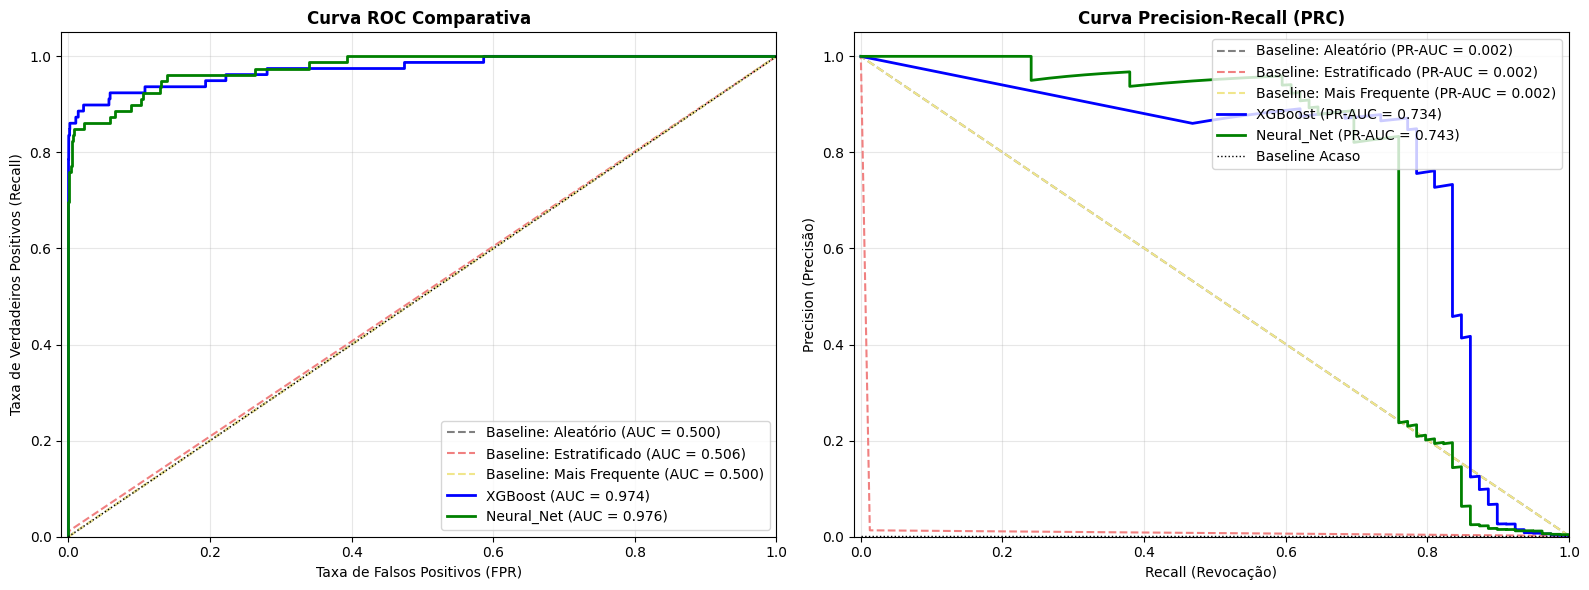

>>> 📊 Gerando gráfico de barras das métricas...


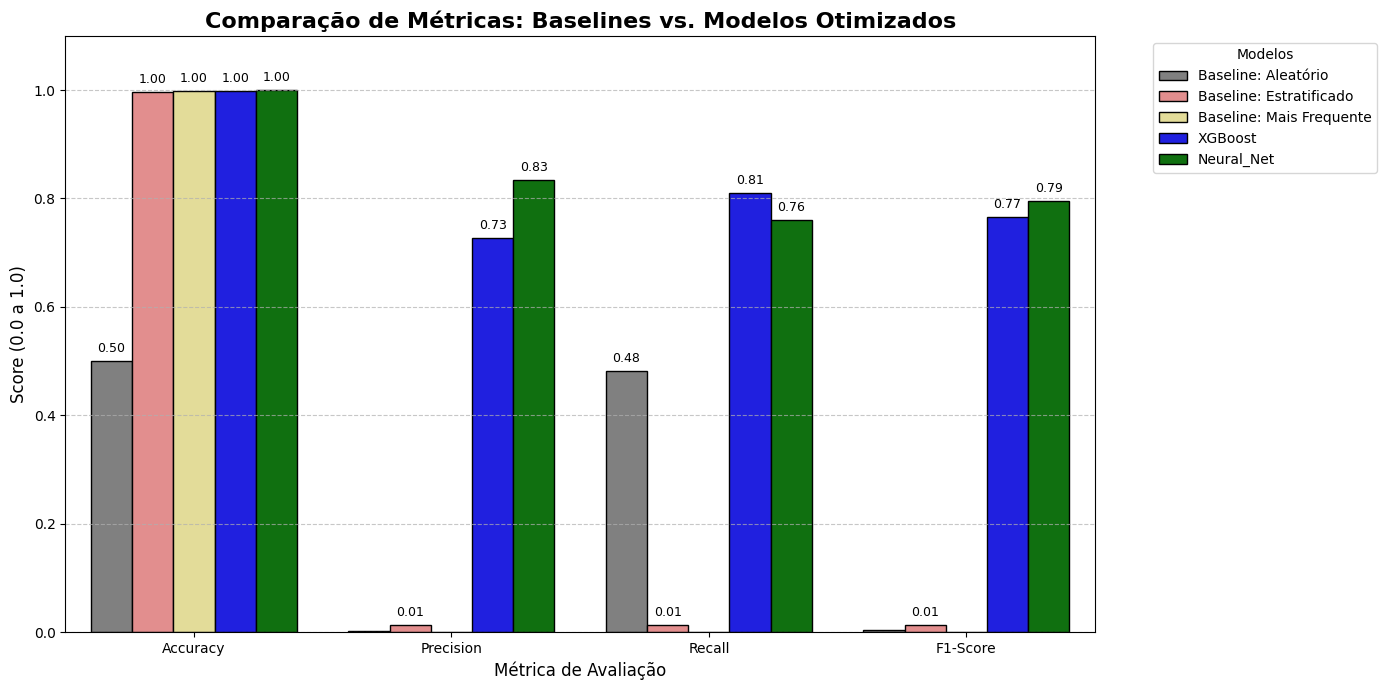

✅ Todos os gráficos de comparação de baseline gerados e salvos na pasta 'paper_artifacts'!
>>> 📋 Gerando tabela com todas as métricas...

TABELA DE MÉTRICAS: BASELINES VS MODELOS OTIMIZADOS
                          Accuracy Precision    Recall  F1-Score   ROC-AUC  \
Baseline: Aleatório       0.500077  0.001668  0.481013  0.003325       0.5   
Baseline: Estratificado   0.996664  0.013333  0.012658  0.012987  0.505516   
Baseline: Mais Frequente  0.998266       0.0       0.0       0.0       0.5   
XGBoost                   0.999144  0.727273  0.810127  0.766467  0.974171   
Neural_Net                 0.99932  0.833333  0.759494  0.794702  0.976191   

                            PR-AUC  
Baseline: Aleatório       0.001734  
Baseline: Estratificado    0.00188  
Baseline: Mais Frequente  0.001734  
XGBoost                   0.734241  
Neural_Net                0.743251  

✅ Tabela salva com sucesso em: ../paper_artifacts\tabela_metricas_comparativas.csv


In [5]:

print(">>> Treinando modelos Baseline (Ingênuos)...")

comparison_results = {}

real_models = {
    'XGBoost': joblib.load(f"../models/new_models/modelo_xgboost.pkl"),
    'Neural_Net': joblib.load(f"../models/new_models/modelo_neural_net.pkl")
}

baselines = {
    'Baseline: Aleatório': DummyClassifier(strategy='uniform', random_state=42),
    'Baseline: Estratificado': DummyClassifier(strategy='stratified', random_state=42),
    'Baseline: Mais Frequente': DummyClassifier(strategy='most_frequent')
}

for name, clf in baselines.items():
    clf.fit(X_train, y_train)

all_models_to_compare = {**baselines, **real_models}

print(">>> 📊 Calculando métricas de avaliação...")

for name, model in all_models_to_compare.items():
    # Previsões
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]
    
    # Métricas
    roc_auc = auc(*roc_curve(y_val, y_prob)[:2])
    pr_auc = average_precision_score(y_val, y_prob)

    prec = precision_score(y_val, y_pred, zero_division=0)
    
    comparison_results[name] = {
        'y_prob': y_prob,
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': prec,
        'Recall': recall_score(y_val, y_pred),
        'F1-Score': f1_score(y_val, y_pred, zero_division=0),
        'ROC-AUC': roc_auc,
        'PR-AUC': pr_auc
    }

print(">>> 📈 Gerando gráficos de curvas...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = ['gray', 'lightcoral', 'khaki', 'blue', 'green'] 
lw = 2

for (name, metrics), color in zip(comparison_results.items(), colors):
    y_prob = metrics['y_prob']
    
    # --- Curva ROC ---
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    axes[0].plot(fpr, tpr, color=color, lw=lw if 'Baseline' not in name else 1.5, 
                 linestyle='--' if 'Baseline' in name else '-',
                 label=f'{name} (AUC = {metrics["ROC-AUC"]:.3f})')
    
    # --- Curva Precision-Recall ---
    precision, recall, _ = precision_recall_curve(y_val, y_prob)
    axes[1].plot(recall, precision, color=color, lw=lw if 'Baseline' not in name else 1.5,
                 linestyle='--' if 'Baseline' in name else '-',
                 label=f'{name} (PR-AUC = {metrics["PR-AUC"]:.3f})')

axes[0].plot([0, 1], [0, 1], color='black', lw=1, linestyle=':')
axes[0].set_xlim([-0.01, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('Taxa de Falsos Positivos (FPR)')
axes[0].set_ylabel('Taxa de Verdadeiros Positivos (Recall)')
axes[0].set_title('Curva ROC Comparativa', fontweight='bold')
axes[0].legend(loc="lower right")
axes[0].grid(alpha=0.3)

baseline_pr = sum(y_val) / len(y_val) 
axes[1].plot([0, 1], [baseline_pr, baseline_pr], color='black', lw=1, linestyle=':', label='Baseline Acaso')
axes[1].set_xlim([-0.01, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Recall (Revocação)')
axes[1].set_ylabel('Precision (Precisão)')
axes[1].set_title('Curva Precision-Recall (PRC)', fontweight='bold')
axes[1].legend(loc="upper right")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(paper_dir, 'curvas_comparativas_baseline.png'), dpi=300)
plt.show()

print(">>> 📊 Gerando gráfico de barras das métricas...")

df_metrics = pd.DataFrame(comparison_results).T
df_metrics = df_metrics.drop(columns=['y_prob', 'ROC-AUC', 'PR-AUC']) 
df_metrics = df_metrics.reset_index().melt(id_vars='index', var_name='Métrica', value_name='Valor')
df_metrics.rename(columns={'index': 'Modelo'}, inplace=True)

plt.figure(figsize=(14, 7))
sns.barplot(data=df_metrics, x='Métrica', y='Valor', hue='Modelo', palette=colors, edgecolor='black')

plt.title('Comparação de Métricas: Baselines vs. Modelos Otimizados', fontsize=16, fontweight='bold')
plt.ylabel('Score (0.0 a 1.0)', fontsize=12)
plt.xlabel('Métrica de Avaliação', fontsize=12)
plt.ylim(0, 1.1)
plt.legend(title='Modelos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()
for p in ax.patches:
    if p.get_height() > 0.01: 
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(paper_dir, 'barras_metricas_baseline.png'), dpi=300)
plt.show()

print("✅ Todos os gráficos de comparação de baseline gerados e salvos na pasta 'paper_artifacts'!")
print(">>> 📋 Gerando tabela com todas as métricas...")

# Cria um DataFrame a partir do dicionário de resultados e transpõe (.T) 
# para que os modelos fiquem nas linhas e as métricas nas colunas
df_tabela_metricas = pd.DataFrame(comparison_results).T

# Remove a coluna 'y_prob', pois ela contém arrays e não valores únicos de métrica
df_tabela_metricas = df_tabela_metricas.drop(columns=['y_prob'])

# Arredonda os valores para 4 casas decimais para facilitar a leitura
df_tabela_metricas = df_tabela_metricas.round(4)

# Exibe a tabela no console
print("\n" + "="*80)
print("TABELA DE MÉTRICAS: BASELINES VS MODELOS OTIMIZADOS")
print("="*80)
# to_markdown() cria uma tabela visualmente agradável no terminal ou Jupyter Notebook
print(df_tabela_metricas) 
print("="*80 + "\n")

# Opcional: Salvar essa tabela em um arquivo CSV na sua pasta de artefatos
caminho_tabela = os.path.join(paper_dir, 'tabela_metricas_comparativas.csv')
df_tabela_metricas.to_csv(caminho_tabela)
print(f"✅ Tabela salva com sucesso em: {caminho_tabela}")

In [ ]:
df_results = pd.DataFrame(comparison_results).T

df_metrics_only = df_results.drop(columns=['y_prob'])

baseline_rows = df_metrics_only[df_metrics_only.index.str.contains('Baseline')]
best_baseline = baseline_rows.max()

metrics_to_print = {
    'Accuracy': 'Acurácia',
    'Recall': 'Recall',
    'Precision': 'Precisão',
    'F1-Score': 'F1-Score',
    'ROC-AUC': 'ROC-AUC',
    'PR-AUC': 'PR-AUC'
}

modelos_para_avaliar = ['XGBoost', 'Neural_Net']

for modelo_nome in modelos_para_avaliar:
    if modelo_nome not in df_metrics_only.index:
        continue 
        
    print("\n" + "="*75)
    print(f"ANÁLISE DE MELHORIA: {modelo_nome.upper()} VS MELHOR BASELINE")
    print("="*75)
    
    model_row = df_metrics_only.loc[modelo_nome]
    improvements = {}
    
    for metric_col, metric_name in metrics_to_print.items():
        baseline_val = best_baseline[metric_col]
        model_val = model_row[metric_col]
        
        if baseline_val > 0.0001:
            imp = ((model_val - baseline_val) / baseline_val) * 100
            improvements[metric_name] = imp
            print(f"{metric_name:12}: {imp:>+8.2f}% de melhoria vs melhor baseline")
        else:
            improvements[metric_name] = "Absoluto"
            print(f"{metric_name:12}: Baseline zerado. Modelo atingiu score de {model_val:.4f}")
            
    print("-" * 75)
    

    resumo_partes = []
    for met, val in improvements.items():
        if met in ['Acurácia', 'Recall', 'Precisão', 'F1-Score']: 
            if isinstance(val, float):
                resumo_partes.append(f"{val:.0f}% em {met.lower()}")
            else:
                resumo_partes.append(f"um salto absoluto em {met.lower()}")
                
    frase_resumo = ", ".join(resumo_partes[:-1]) + " e " + resumo_partes[-1]
    

    print("="*75)


ANÁLISE DE MELHORIA: XGBOOST VS MELHOR BASELINE
Acurácia    :    +0.09% de melhoria vs melhor baseline
Recall      :   +68.42% de melhoria vs melhor baseline
Precisão    : +5354.55% de melhoria vs melhor baseline
F1-Score    : +5801.80% de melhoria vs melhor baseline
ROC-AUC     :   +92.71% de melhoria vs melhor baseline
PR-AUC      : +38945.67% de melhoria vs melhor baseline
---------------------------------------------------------------------------

ANÁLISE DE MELHORIA: NEURAL_NET VS MELHOR BASELINE
Acurácia    :    +0.11% de melhoria vs melhor baseline
Recall      :   +57.89% de melhoria vs melhor baseline
Precisão    : +6150.00% de melhoria vs melhor baseline
F1-Score    : +6019.21% de melhoria vs melhor baseline
ROC-AUC     :   +93.11% de melhoria vs melhor baseline
PR-AUC      : +39424.81% de melhoria vs melhor baseline
---------------------------------------------------------------------------
